# Benchmarks

## Initialize

In [1]:
#library(Rmisc)
library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
library(data.table)
library("jsonlite")
library(ggthemes)

Warning message:
“package ‘dtplyr’ was built under R version 4.0.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.0.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘tibble’ was built under R version 4.0.5”
Warning message:
“package ‘tidyr’ was built under R version 4.0.5”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘purrr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::f

In [2]:
if (grepl("sc", Sys.info()[["nodename"]], fixed=TRUE)) {
    base_path = "/sc-projects/sc-proj-ukb-cvd"
} else {
    base_path = "/data/analysis/ag-reils/ag-reils-shared/cardioRS"}
print(base_path)

project_label = "22_retina_phewas"
project_path = glue("{base_path}/results/projects/{project_label}")
figure_path = glue("{project_path}/figures")
output_path = glue("{project_path}/data")

experiment = '221108'
experiment_path = glue("{output_path}/{experiment}")

[1] "/sc-projects/sc-proj-ukb-cvd"


In [3]:
today = '221109'

In [4]:
base_size = 8
title_size = 10
facet_size = 10
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major=element_line()))

In [5]:
colors_dict = read_json("colors.json")
color_map <- c(
    "Age+Sex" = colors_dict$pastel$red$mid,
    "Retina" = colors_dict$pastel$red$mid,
    "Age+Sex+Retina" = colors_dict$pastel$red$mid,
    'MultiTaskSurvivalTraining_None_InceptionResnetV2+MLP_Identity' = colors_dict$pastel$red$mid
    #"Identity(AgeSex)+MLP" = colors_dict$pastel$red$mid,
    #"Identity(Records)+MLP" = colors_dict$pastel$red$mid,
    #"GNN(Records)+MLP" = colors_dict$pastel$red$mid,
    #"Identity(AgeSex+Records)+MLP" = colors_dict$pastel$red$mid,
    #"GNN(AgeSex+Records)+MLP" = colors_dict$pastel$red$mid
)

In [6]:
endpoint_defs = arrow::read_feather(glue("{output_path}/phecode_defs_220306.feather")) %>% arrange(endpoint)

In [7]:
endpoint_map = endpoint_defs$phecode_string
names(endpoint_map) =  endpoint_defs$endpoint
endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint

In [8]:
endpoint_selection = c(
    # generally very important
    "phecode_202", # Diabetes mellitus
    "phecode_401",	#Hypertension"  
    "phecode_404", # Ischemic heart disease   
    "phecode_404-1", # Myocardial infarction [Heart attack]
    "phecode_431-11", # Cerebral infarction [Ischemic stroke]
    "phecode_424", # Heart failure

    
    "phecode_059-1", # COVID 19
    "phecode_468", # Pneumonia
    "phecode_474", # Chronic obstructive pulmonary disease [COPD]
      
    "phecode_286-2", #	Major depressive disorder
    "phecode_324-11", #Parkinson's Disease
    "phecode_328", # Dementias and cerebral degeneration

    
    "phecode_164", # Anemia
    "phecode_726-1", # Osteoporosis
    "phecode_371", # Cataract
    "phecode_374-42", # Diabetic retinopathy
    "phecode_374-5", # Macular degeneration
    "phecode_375-1", # Glaucoma
    
    
    "phecode_103", # Malignant neoplasm of the skin
    "phecode_101", # Malignant neoplasm of the digestive organs
    "phecode_102", # LUNG CANCER
    
    "phecode_583", # Chronic kidney disease    
    "phecode_542", # Chronic liver disease and sequelae    
    "OMOP_4306655" # All-Cause Death
    
    # also generally important and relevant
    #"phecode_440-3", # Pulmonary embolism
    #"phecode_468-1",	#Viral pneumonia
#     "phecode_460-2",	#Acute lower respiratory infection
    #"phecode_388" # Blindness and low vision
      # generally important and fun to check
   # "phecode_374-3", # Retinal vascular changes and occlusions
    #"phecode_665", # Psoriasis
#     "phecode_121", # Leukemia
    # important for eye
#     "phecode_705-1", # Rheumatoid arthritis
)

endpoints_common = c(
   'phecode_164', #Anemia
 'phecode_705-1', #Rheumatoid arthritis
 'phecode_328', #Dementias and cerebral degeneration
 'phecode_328-1', #Alzheimer's disease
 'phecode_401', #Hypertension
 'phecode_202', #Diabetes mellitus
 'phecode_416-21', #Atrial fibrillation
 'phecode_404-1', #Myocardial infarction [Heart attack]
 'phecode_424', #Heart failure
 'phecode_468', #Pneumonia
 'phecode_474', #Chronic obstructive pulmonary disease [COPD]
 'phecode_583', #Chronic kidney disease
 'OMOP_4306655' #All-Cause Death
    )
    
endpoints_cardio = c(
    'phecode_438-11',   #  "Abdominal aortic aneurysm",
    'phecode_440-3',#  "Pulmonary embolism", # intervention
    'phecode_413-21',#  "Aortic stenosis", # intervention
    'phecode_400'#  "Rheumatic fever and chronic rheumatic heart diseases",	
)

endpoints_eye= c(
    'phecode_374-5', #Macular degeneration
 'phecode_374-51', #Age-related macular degeneration
 'phecode_374-42', #Diabetic retinopathy
 'phecode_371', #Cataract
 'phecode_388', #Blindness and low vision
 'phecode_367-5', #Uveitis
 'phecode_389-1' #Ocular pain
)

In [9]:
endpoint_defs = endpoint_defs %>% 
    mutate(name = phecode_string) %>%
    mutate(name = 
           case_when( 
               phecode_string == "Myocardial infarction [Heart attack]"~"Myocardial infarction",
               phecode_string == "Cerebral infarction [Ischemic stroke]"~"Ischemic stroke",
               phecode_string == "Chronic obstructive pulmonary disease [COPD]"~"Chronic obstructive pulmonary disease",
               phecode_string == "Mitral valve insufficiency"~"Mitral insufficiency",
               phecode_string == "Parkinson's disease (Primary)"~"Parkinson's disease",
               phecode_string == "Suicide ideation and attempt or self harm"~"Suicide attempt",
               phecode_string == "Ischemic heart disease"~"Coronary heart disease",
               phecode_string == "Chronic kidney disease"~"Chronic kidney disease",
               phecode_string == "Rheumatic fever and chronic rheumatic heart diseases"~"Rheumatic heart disease",
               phecode_string == "Abdominal aortic aneurysm"~"Abdominal aortic aneurysm",
                  TRUE ~ name)
           )
            
endpoint_map = endpoint_defs$name
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint
endpoint_order = endpoint_selection

In [10]:
endpoints_cardio = c(
    'phecode_431-11', #  "Cerebral infarction [Ischemic stroke]",
    'phecode_404', #  "Ischemic heart disease",
    'phecode_404-1', #  "Myocardial infarction [Heart attack]", # intervention
    'phecode_424', #  "Heart failure", # intervention
     'OMOP_4306655', #  "All-Cause Death", # intervention
    'phecode_420' #  "Cardiac arrest", # intervention
   
)

## Load data

# Load Benchmarks

In [11]:
name = "hrs_endpoints"
hrs_endpoints = arrow::read_feather(glue("{experiment_path}/{name}.feather"), col_select=c("endpoint", "score", "partition", "hrs_ret", "hrs_ret_age", "hrs_ret_sex")) %>% left_join(endpoint_defs) 

Joining, by = "endpoint"


In [12]:
hrs_endpoints

endpoint,score,partition,hrs_ret,hrs_ret_age,hrs_ret_sex,phecode,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf,name
<glue>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
OMOP_4306655,Age+Sex+Retina,0,3.067072,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,Age+Sex+Retina,1,3.343209,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,Age+Sex+Retina,2,3.046918,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,Age+Sex+Retina,3,3.465731,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,Age+Sex+Retina,4,3.204823,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,Age+Sex+Retina,5,3.008772,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,Age+Sex+Retina,6,3.167732,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,Age+Sex+Retina,7,3.328349,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,Age+Sex+Retina,8,3.363799,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death


In [13]:
hrs = hrs_endpoints %>% 
    group_by(endpoint, score, phecode_string, phecode_category) %>% 
    #filter(score %in% c("Retina", "Age+Sex+Retina", "Age+Sex+Retina+I(Age*ret)")) %>%
    #mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    #mutate(phecode_category = factor(phecode_category, levels=pcats_sorted)) %>%
    select(endpoint, score, hrs_ret, hrs_ret_age, hrs_ret_sex, phecode_string, phecode_category) %>%
    ungroup()
hrs

endpoint,score,hrs_ret,hrs_ret_age,hrs_ret_sex,phecode_string,phecode_category
<glue>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
OMOP_4306655,Age+Sex+Retina,3.067072,NA,NA,All-Cause Death,Death
OMOP_4306655,Age+Sex+Retina,3.343209,NA,NA,All-Cause Death,Death
OMOP_4306655,Age+Sex+Retina,3.046918,NA,NA,All-Cause Death,Death
OMOP_4306655,Age+Sex+Retina,3.465731,NA,NA,All-Cause Death,Death
OMOP_4306655,Age+Sex+Retina,3.204823,NA,NA,All-Cause Death,Death
OMOP_4306655,Age+Sex+Retina,3.008772,NA,NA,All-Cause Death,Death
OMOP_4306655,Age+Sex+Retina,3.167732,NA,NA,All-Cause Death,Death
OMOP_4306655,Age+Sex+Retina,3.328349,NA,NA,All-Cause Death,Death
OMOP_4306655,Age+Sex+Retina,3.363799,NA,NA,All-Cause Death,Death


In [14]:
unique(hrs$score)

[1] "Age+Sex+Retina" "Retina"

In [15]:
purrr::map_dfr(integer(100), ~ hrs %>% group_by(endpoint, score) %>% sample_frac(1, replace=TRUE), .id="i") -> temp_hrs

In [16]:
library(ggdist)

Warning message:
“package ‘ggdist’ was built under R version 4.0.5”


In [17]:
temp_hrs_ret = temp_hrs %>% group_by(endpoint, score, phecode_string, phecode_category) %>% median_qi(hrs_ret, hrs_ret_age, hrs_ret_sex, na.rm=TRUE)

In [19]:
temp_hrs_linear = temp_hrs %>% ungroup() %>%
    filter(score %in% c("Retina",
                        "Age+Sex+Retina"
#                        "SCORE2+Retina",
#                        "ASCVD+Retina",
#                        "QRISK3+Retina"
                       )) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>% 
    median_qi(`hrs_ret`, na.rm=TRUE) %>% rename(hr = `hrs_ret`) %>%
    mutate(hr = round(hr, 2), .lower=round(.lower, 2), .upper=round(.upper, 2)) %>%#c(hr, .lower, .upper), round, 1) %>%
    mutate(HR_Retina = glue("{hr} ({.lower}, {.upper})")) %>% 
    select(endpoint, score, phecode_string, phecode_category, HR_Retina) %>%
    pivot_wider(names_from="score", values_from="HR_Retina") %>% 
    select(all_of(c("phecode_category", "endpoint", "phecode_string", "Retina", 'Age+Sex+Retina'
#                     "SCORE2+Retina", "ASCVD+Retina","QRISK3+Retina"
                   ))) %>% 
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    arrange(endpoint) %>%
    #mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>%
    ungroup()
    
temp_hrs_linear

phecode_category,endpoint,phecode_string,Retina,Age+Sex+Retina
<chr>,<fct>,<chr>,<glue>,<glue>
Endo,phecode_202,Diabetes mellitus,"2.96 (2.73, 3.22)","3.12 (2.87, 3.42)"
Cardio,phecode_401,Hypertension,"2.88 (2.61, 3.09)","2.64 (2.42, 2.85)"
Cardio,phecode_404,Ischemic heart disease,"3.24 (2.95, 3.48)","2.73 (2.51, 2.94)"
Cardio,phecode_404-1,Myocardial infarction [Heart attack],"3.47 (3.02, 3.78)","3 (2.65, 3.2)"
Cardio,phecode_431-11,Cerebral infarction [Ischemic stroke],"3.72 (3.26, 4.12)","3.34 (3.02, 3.67)"
Cardio,phecode_424,Heart failure,"3.67 (3.26, 4.06)","3.29 (2.91, 3.67)"
ID,phecode_059-1,COVID-19*,"3.79 (3.29, 4.42)","3.73 (3.27, 4.35)"
Resp,phecode_468,Pneumonia,"3.73 (3.44, 4.01)","3.61 (3.32, 3.89)"
Resp,phecode_474,Chronic obstructive pulmonary disease [COPD],"3.67 (3.23, 3.88)","3.63 (3.3, 3.96)"


In [20]:
# new, after bugfix
temp_hrs_linear %>% filter(endpoint %in% endpoint_selection) %>% select(-phecode_category)

endpoint,phecode_string,Retina,Age+Sex+Retina
<fct>,<chr>,<glue>,<glue>
phecode_202,Diabetes mellitus,"2.96 (2.73, 3.22)","3.12 (2.87, 3.42)"
phecode_401,Hypertension,"2.88 (2.61, 3.09)","2.64 (2.42, 2.85)"
phecode_404,Ischemic heart disease,"3.24 (2.95, 3.48)","2.73 (2.51, 2.94)"
phecode_404-1,Myocardial infarction [Heart attack],"3.47 (3.02, 3.78)","3 (2.65, 3.2)"
phecode_431-11,Cerebral infarction [Ischemic stroke],"3.72 (3.26, 4.12)","3.34 (3.02, 3.67)"
phecode_424,Heart failure,"3.67 (3.26, 4.06)","3.29 (2.91, 3.67)"
phecode_059-1,COVID-19*,"3.79 (3.29, 4.42)","3.73 (3.27, 4.35)"
phecode_468,Pneumonia,"3.73 (3.44, 4.01)","3.61 (3.32, 3.89)"
phecode_474,Chronic obstructive pulmonary disease [COPD],"3.67 (3.23, 3.88)","3.63 (3.3, 3.96)"


In [22]:
temp_hrs_linear  %>% 
    select(-phecode_category) %>%
    mutate_if(is.numeric, round, 3) %>%
    write_csv("outputs/SupplTable2_HRsLinearAll_CropRatio-0.66.csv")

In [47]:
temp_hrs_linear  %>% 
    select(-phecode_category) %>%
    filter(endpoint %in% endpoints_cardio) %>%
        mutate_if(is.numeric, round, 3) %>%
write_csv("outputs/SupplTable2_HRsLinearCARDIO_CropRatio-0.66.csv")

In [23]:
temp_hrs_linear  %>% 
    select(-phecode_category) %>%
    filter(endpoint %in% endpoint_selection) %>% mutate_if(is.numeric, round, 3) %>%
    write_csv("outputs/SupplTable2_HRsLinearSELECTION_CropRatio-0.66.csv")

In [24]:
1/0

[1] Inf

In [27]:
tmp_sign = read_csv(glue("outputs/SupplTable2_SignificantEndpoints_CropRatio-0.66.csv"))


── Column specification ────────────────────────────────────────────────────────
cols(
  endpoint = col_character(),
  phecode_string = col_character(),
  phecode_category = col_character(),
  delta = col_double(),
  .lower = col_double(),
  .upper = col_double(),
  .width = col_double(),
  .point = col_character(),
  .interval = col_character()
)



In [44]:
temp_hrs_linear %>% 
    filter(phecode_string %in% tmp_sign$phecode_string) %>%
    select(-phecode_category) %>%
    write_csv("outputs/SupplTable2_HRsLinearSIGNIFICANT_CropRatio-0.66.csv")

## Interactions

In [24]:
temp_int_age = temp_hrs %>% ungroup() %>%
    filter(score %in% c("Age+Sex+Retina+I(Age*ret)")) %>%
    pivot_longer(all_of(c("hrs_ret", "hrs_ret_age", "hrs_ret_sex")), names_to="variable", values_to="hr") %>%
    filter(variable == "hrs_ret_age")

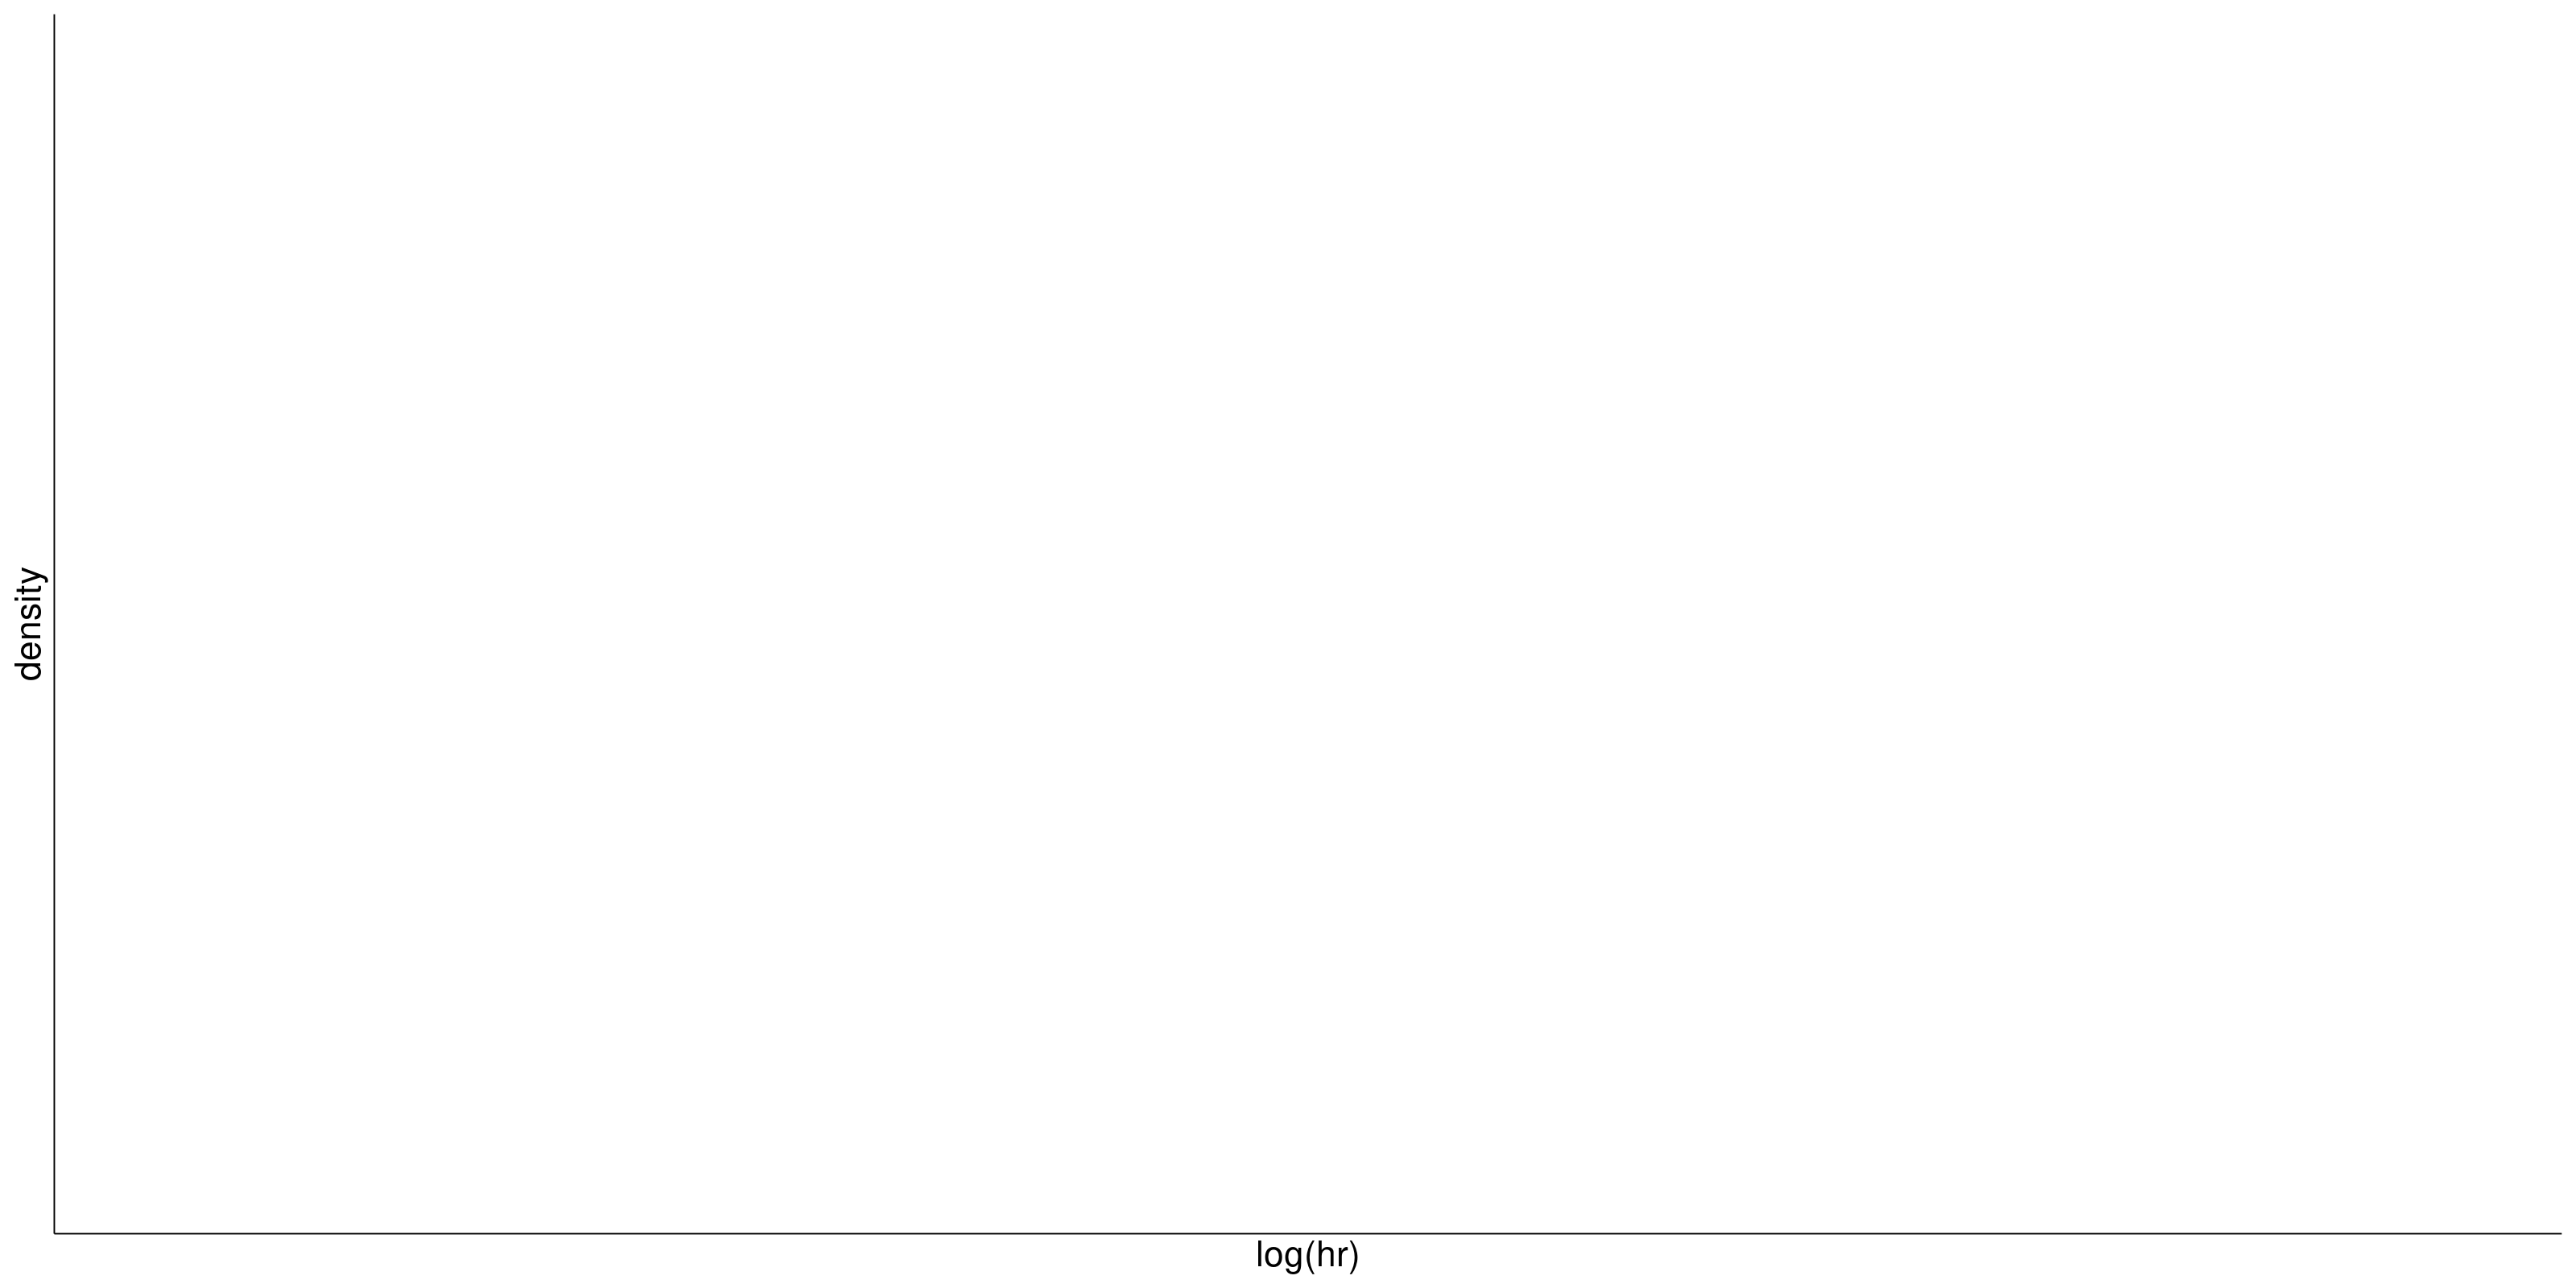

In [25]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

ggplot(temp_int_age, aes(x=log(hr))) + geom_density(fill="black", alpha=0.3)

In [26]:
temp_int_sex= temp_hrs %>% ungroup() %>%
    filter(score %in% c("Age+Sex+Retina+I(Age*ret)")) %>%
    pivot_longer(all_of(c("hrs_ret", "hrs_ret_age", "hrs_ret_sex")), names_to="variable", values_to="hr") %>%
    filter(variable == "hrs_ret_sex")

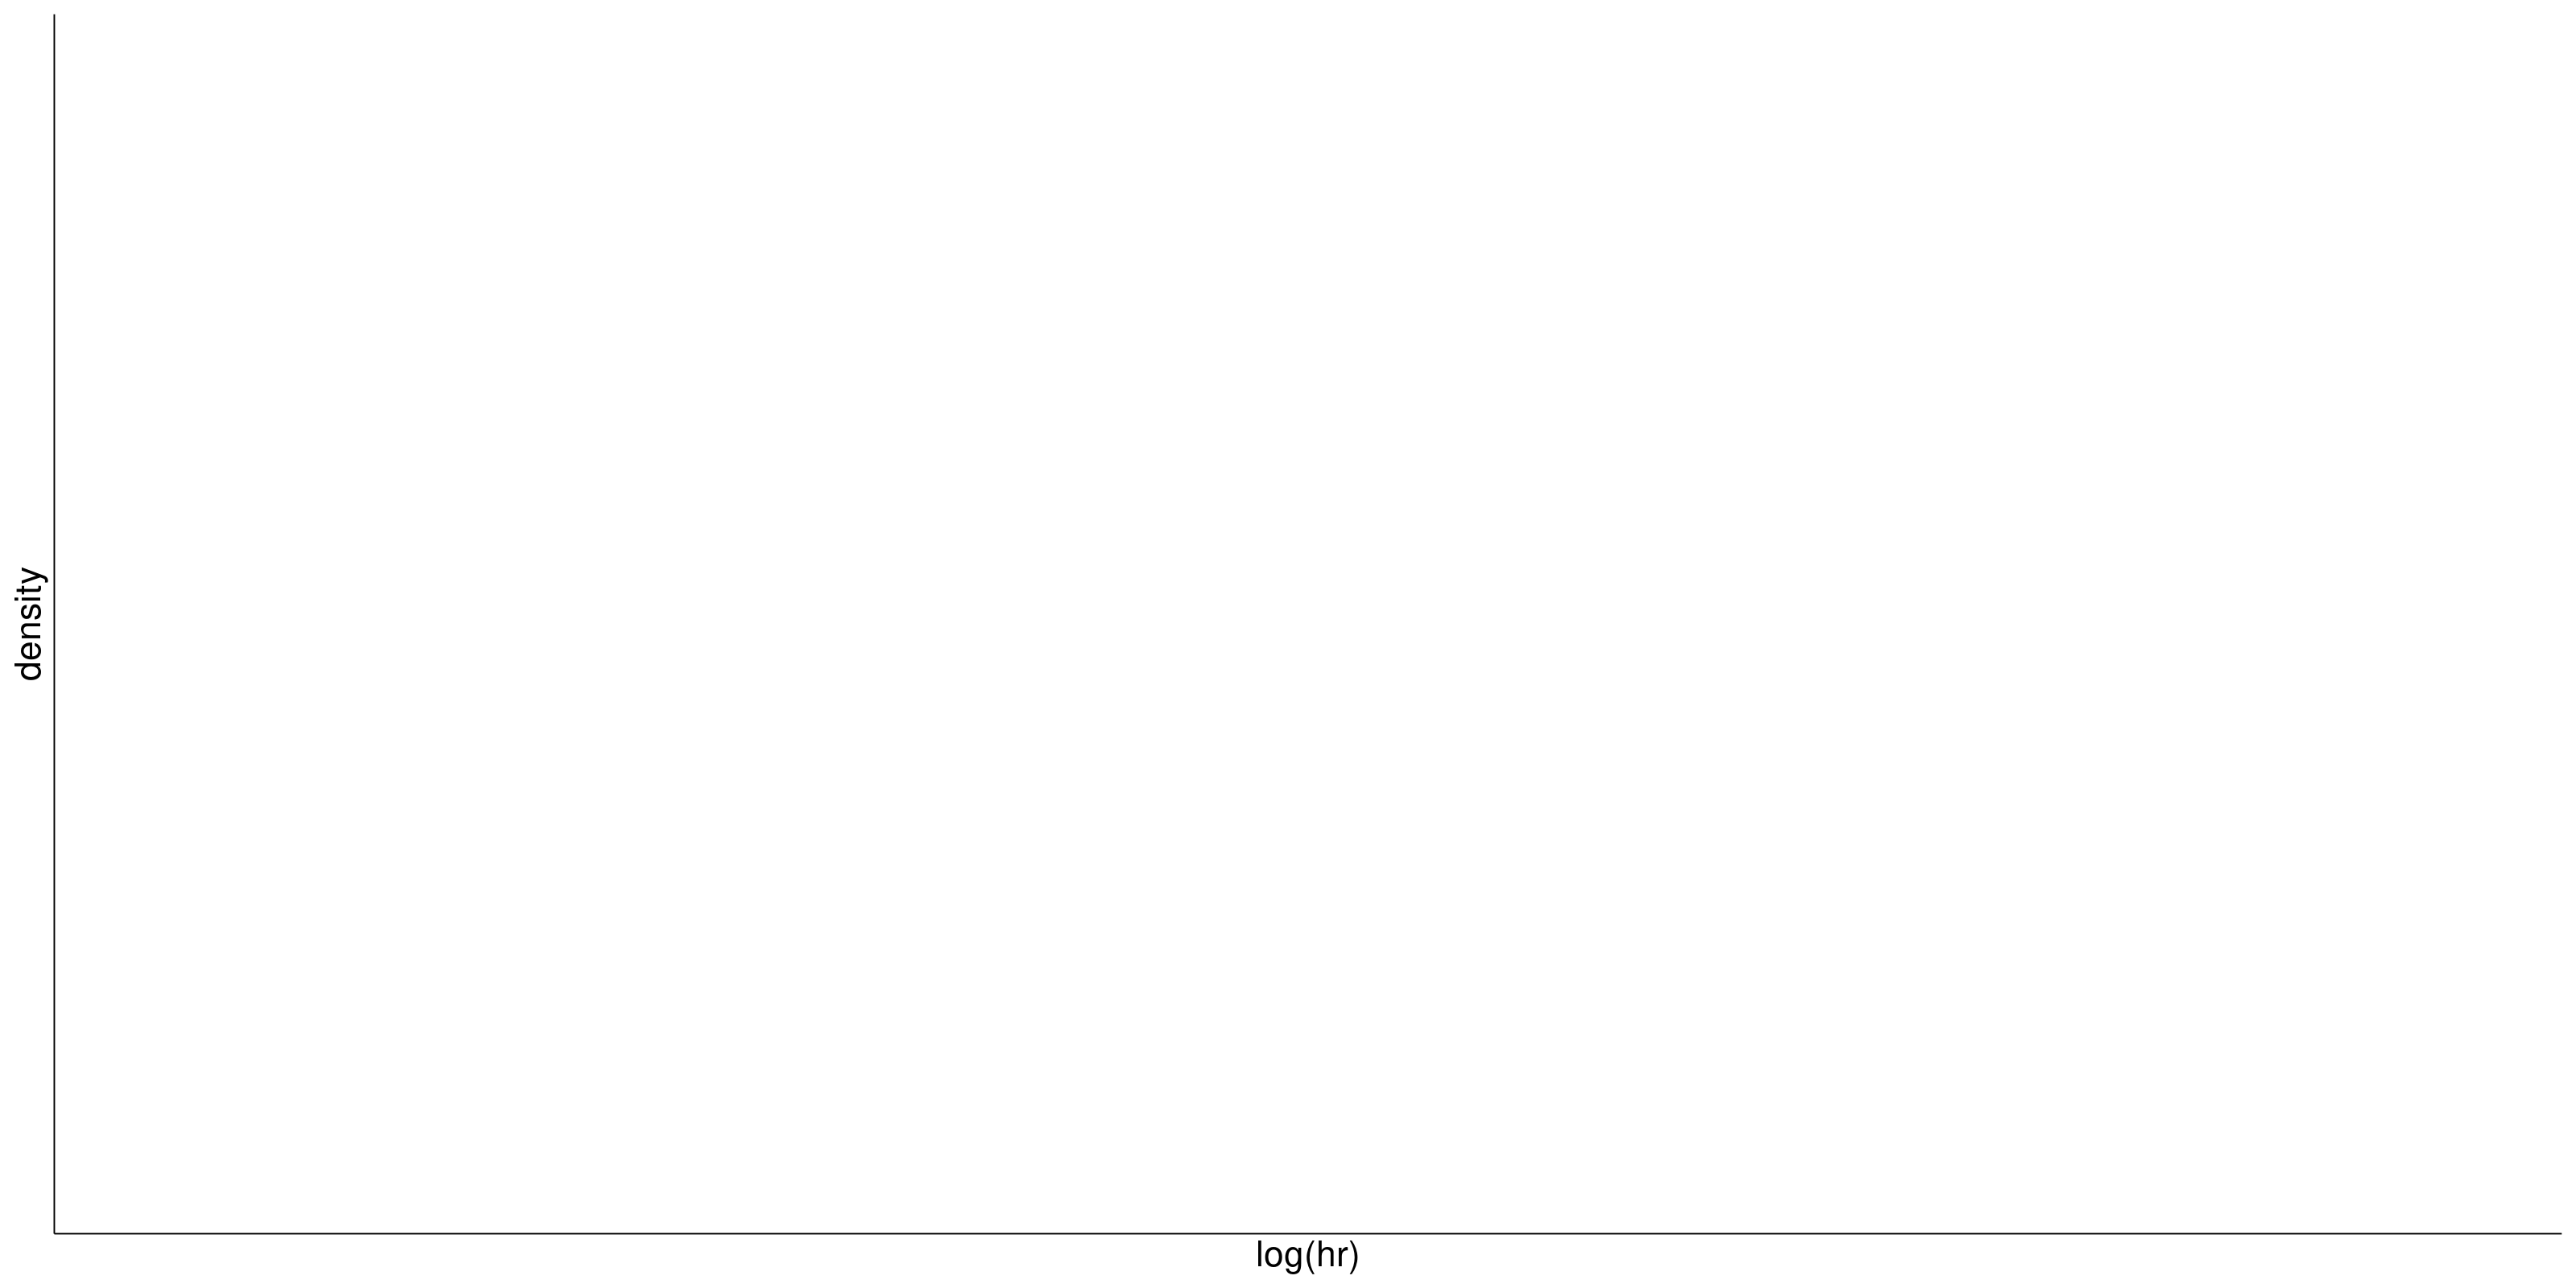

In [27]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

ggplot(temp_int_sex, aes(x=log(hr))) + geom_density(fill="black", alpha=0.3)

In [28]:
temp_hrs_int = temp_hrs %>% 
    filter(score %in% c("Age+Sex+Retina+I(Age*ret)")) %>%
    pivot_longer(all_of(c("hrs_ret", "hrs_ret_age", "hrs_ret_sex")), names_to="variable", values_to="hr") %>%
    group_by(endpoint, score, variable, phecode_string, phecode_category) %>% 
    median_qi(hr, na.rm=TRUE) %>% 
    mutate(hr = round(hr, 2), .lower=round(.lower, 2), .upper=round(.upper, 2)) %>%#c(hr, .lower, .upper), round, 1) %>%
    mutate(HR_label = glue("{hr} ({.lower}, {.upper})")) %>% 
    select(endpoint, variable, phecode_string, phecode_category, HR_label) %>%
    pivot_wider(names_from="variable", values_from="HR_label") %>% 
    select(all_of(c("phecode_category", "endpoint", "phecode_string", "hrs_ret", "hrs_ret_age", "hrs_ret_sex"))) %>% 
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    arrange(endpoint) %>%
#mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>%
    ungroup() %>%
    rename(HR_Retina = hrs_ret, `HR_Retina*Age`=hrs_ret_age, `HR_Retina*Sex`=hrs_ret_sex)
    
temp_hrs_int

ERROR: [1m[33mError[39m in [1m[1m`mutate()`:[22m
[1m[22m[33m![39m Problem while computing `hr = round(hr, 2)`.
[1mCaused by error:[22m
[33m![39m object 'hr' not found


In [ ]:
temp_hrs_int %>% filter(endpoint %in% endpoint_selection) %>% select(-phecode_category) %>% 

In [ ]:
temp_hrs_int %>% arrange(`HR_Retina*Age`)

In [ ]:
ggplot()

In [ ]:
temp_hrs_agg  %>% 
    write_csv("outputs/SupplTable2_HRsAll.csv")

In [ ]:
select(all_of(c("phecode_category", "endpoint", "phecode_string", "Retina", 'Age+Sex+Retina'))) %>% 
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    arrange(phecode_category, endpoint) %>%
%>% filter(endpoint %in% endpoint_selection)

In [ ]:
temp_hrs_agg

In [ ]:
temp_hrs_agg = temp_hrs %>% filter(endpoint %in% ep_sel) %>%
    group_by(endpoint, features) %>% median_qi(`exp(coef)`, na.rm=TRUE) %>% rename(hr = `exp(coef)`) %>%
    mutate(hr = round(hr, 2), .lower=round(.lower, 2), .upper=round(.upper, 2)) %>%#c(hr, .lower, .upper), round, 1) %>%
    mutate(HR_Retina = glue("{hr} ({.lower}, {.upper})")) %>% 
    select(endpoint, features, HR_Retina) %>%
    pivot_wider(names_from="features", values_from="HR_Retina") %>% 
    select(all_of(c("endpoint", 'Age+Sex+Retina', 
                    #'SCORE2+Retina', 
                    'ASCVD+Retina', 
                   "PANEL+Retina"))) %>% 
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% arrange(endpoint) %>%
    mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>%
    ungroup()
temp_hrs_agg

In [ ]:
fts_map = c(
    "Retina" = "MET",
    "COX_Age+Sex" = "AgeSex",
    "Age+Sex+Retina" = "AgeSex+MET",
    "COX_ASCVD" = "ASCVD",
    "ASCVD+Retina" = "ASCVD+MET",
    "COX_PANEL" = "PANEL", 
    "PANEL+Retina" = "PANEL+MET"
               )

In [ ]:
hr_labels = temp_hrs_agg %>% 
    pivot_longer(-endpoint, names_to="features", values_to="HR")
hr_labels

In [ ]:
temp_hr

In [ ]:
endpoints_sorted = (temp_hr %>% filter(score == "Age+Sex+Retina") %>% arrange(endpoint))$endpoint

In [ ]:
pcats_sorted = (temp_hr %>% arrange(endpoint) %>% distinct(phecode_category))$phecode_category

In [ ]:
temp_hr %>% arrange(desc(hr)) %>% filter(endpoint %in% endpoint_selection)

In [ ]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

temp_hr %>% 
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    mutate(phecode_category = factor(phecode_category, levels=pcats_sorted)) %>%
    filter(endpoint %in% endpoint_selection) %>%
    ggplot(aes(x=endpoint, y=hr, color=phecode_category)) + 
    geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=hr), color="black")+
    geom_point(size=1) + 
    geom_text(aes(y=hr+1, label=round(hr, 2)), size=2.5, hjust=-0)+
    geom_text(aes(y=hr+5, label=phecode_string), size=2.5, hjust=0)+
    coord_flip(ylim=c(0, 100)) + 
    facet_grid(rows=vars(phecode_category), scales="free_y", space="free_y")+
    theme(strip.text.y = element_text(angle=0))#+ facet_wrap(~phecode_category, scales="free_x")

In [ ]:
plot_width = 10; plot_height=75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

temp_hr %>% 
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    mutate(phecode_category = factor(phecode_category, levels=pcats_sorted)) %>%
    filter(endpoint %in% endpoint_selection) %>%
    ggplot(aes(x=endpoint, y=hr, color=phecode_category)) + 
    geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=hr), color="black")+
    geom_point(size=1) + 
    geom_text(aes(y=hr+1, label=round(hr, 2)), size=2.5, hjust=-0)+
    geom_text(aes(y=hr+5, label=phecode_string), size=2.5, hjust=0)+
    coord_flip(ylim=c(0, 100)) + 
    facet_grid(rows=vars(phecode_category), scales="free_y", space="free_y")#+ facet_wrap(~phecode_category, scales="free_x")

In [ ]:
plot_width = 10; plot_height=10; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
temp_hr %>% 
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    mutate(phecode_category = factor(phecode_category, levels=pcats_sorted)) %>%
    ggplot(aes(x=hr)) + geom_density(bw=1) + coord_cartesian(xlim=c(0, 20))

In [ ]:
endpoint_sample = (benchmark_endpoints %>% select(endpoint) %>% distinct() %>% sample_n(20))$endpoint

In [ ]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

scores_plot = c("AgeSex", "Retina", "Age+Sex+Retina")#, "AgeSexRetina")

temp = benchmark_endpoints %>% filter(score %in% scores_plot) %>% mutate(score = factor(score, levels=scores_plot)) %>% filter(endpoint %in% endpoint_sample)
temp %>% 
    ggplot(aes(x=score, y=cindex, fill=score, color=score)) + 
    geom_boxplot()+
    coord_flip()+
    #geom_violin(alpha=0.5) + 
    facet_wrap(~endpoint, labeller=labeller(endpoint=endpoint_map))